# Técnicas de procesamiento de datos para el análisis estadístico y para la construcción de modelos
Autor: Ricardo Ramírez Condado - A01379299

In [2]:
# modules we'll use
import pandas as pd
import numpy as np

# read in all our data
# Cargando el archivo CSV
youtube_data = pd.read_csv("Global YouTube Statistics.csv", encoding="ISO-8859-1")

# set seed for reproducibility
np.random.seed(0)

In [3]:
youtube_data.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


## 2. Clasificación de variables

Necesitamos conocer más a detalle nuestro dataset por ello hacemos un análisis rápido.

In [14]:
column_types = youtube_data.dtypes
unique_values = youtube_data.nunique()

# Creando un DataFrame para mostrar esta información
column_classification = pd.DataFrame({
    'Data Type': column_types,
    'Unique Values': unique_values
})
column_classification

,Data Type,Unique Values
rank,float64,995
Youtuber,object,995
subscribers,float64,289
video views,float64,988
category,object,18
Title,object,992
uploads,float64,777
Country,object,49
Abbreviation,object,49
channel_type,object,14


## 3. Identificación de problemas de calidad de datos

In [15]:
# get the number of missing data points per column
missing_values_count = youtube_data.isnull().sum()

# look at the # of missing points in the first ten columns
# missing_values_count[0:10]
missing_values_count[0:]

rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              0
created_date                               0
Gross tert

In [16]:
# how many total missing values do we have?
total_cells = np.product(youtube_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.0


In [17]:
# Identificando registros duplicados
duplicated_rows = youtube_data[youtube_data.duplicated()]

# Mostrando la cantidad de registros duplicados
num_duplicated_rows = len(duplicated_rows)
num_duplicated_rows

0

In [18]:
# Calculando la cantidad y el porcentaje de valores faltantes por columna
missing_values_count = youtube_data.isnull().sum()
missing_values_percentage = (youtube_data.isnull().sum() / len(youtube_data)) * 100

# Creando un DataFrame para mostrar esta información
missing_data_info = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage': missing_values_percentage
})

missing_data_info[missing_data_info['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

,Missing Values,Percentage


Ahora es momento de detectar valores outliers, para ello se usaron datos numéricos que contenían sus datos completos, y que por ende eran clave para el analisis.

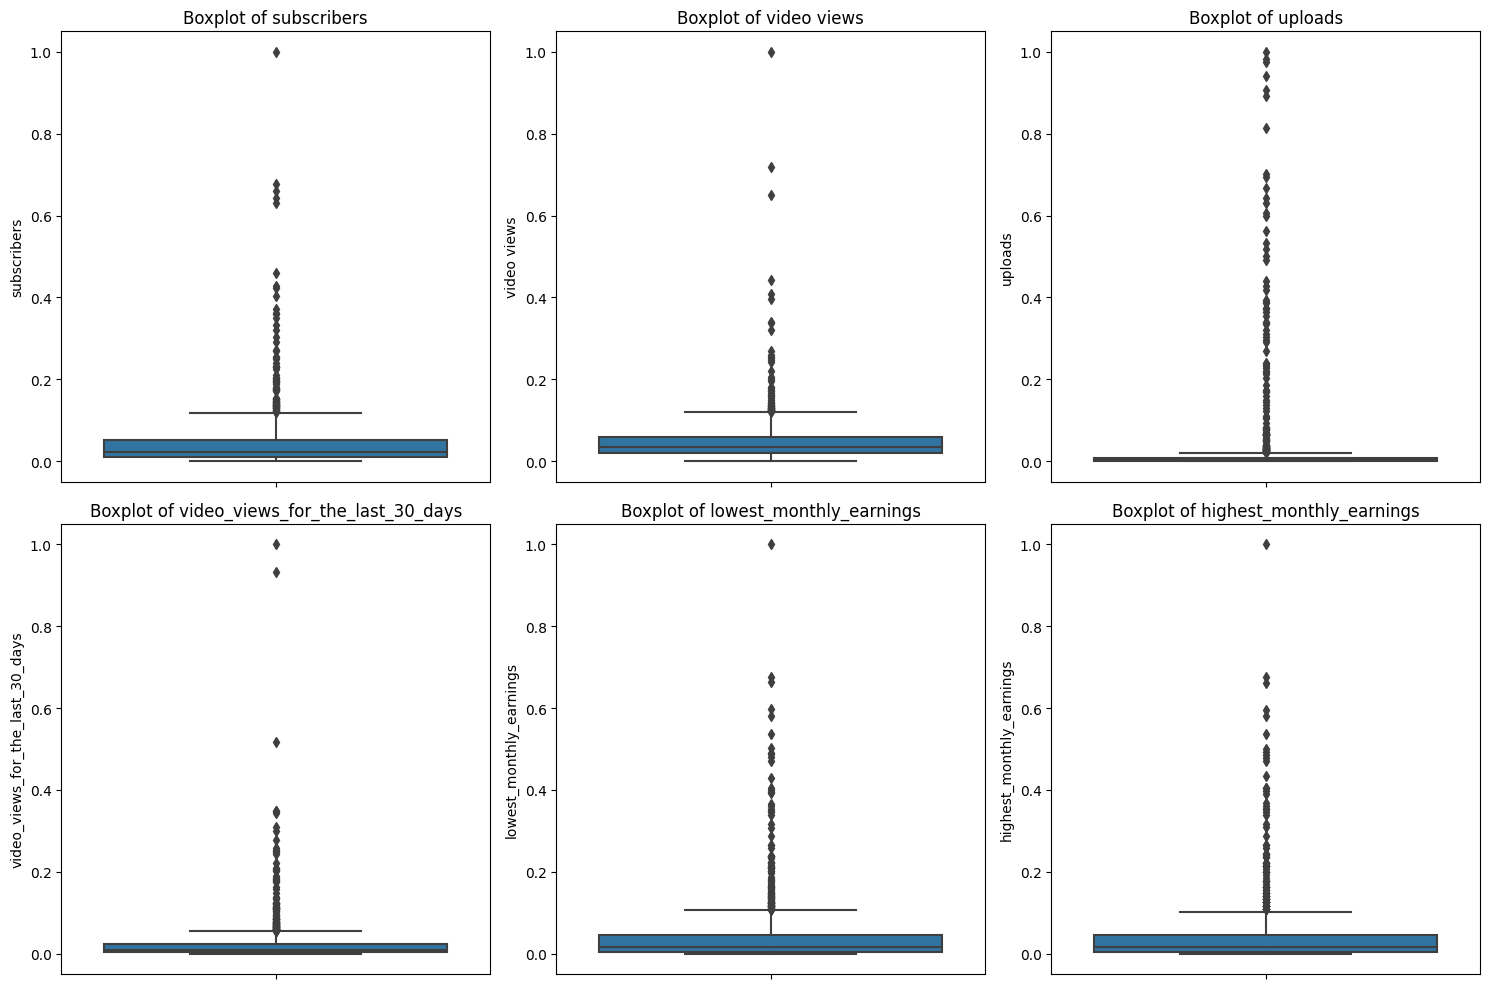

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionando algunas columnas numéricas clave para visualizar outliers
columns_to_plot = ['subscribers', 'video views', 'uploads', 'video_views_for_the_last_30_days',
                   'lowest_monthly_earnings', 'highest_monthly_earnings']

# Visualizando boxplots
plt.figure(figsize=(15,10))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=youtube_data[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

1. subscribers: Hay algunos canales con un número excepcionalmente alto de suscriptores que pueden considerarse outliers, esto dependiendo del estudio, ya que este dataset ´sólo concentra a youtubers con un alto índice de suscriptores.

2. video views: Así como "subscribers", hay canales con un número extremadamente alto de vistas de videos.

3. uploads: La mayoría de los canales tienen un número relativamente bajo, pero hay algunos con valores muy altos.

4. video_views_for_the_last_30_days: La mayoría de canales con alto índice de suscrptores tienen un números enormes de vistas en los últimos 30 días comparado a otros.


## 4. Preprocesamiento

### 4.1 Imputación de valores faltantes

Para nuestro tratamiento haremos la imputación de valores faltantes, esto debido a los siguientes razones:

- Si conjunto de datos tiene valores faltantes, una opción podría ser eliminar registros completos que contienen valores nulos. Sin embargo, esto podría resultar en la pérdida de información valiosa y reducir el tamaño de nuestra muestra, lo cual puede afectar la robustez de cualquier análisis posterior. Al imputar valores, conservamos la mayor cantidad de datos posible.
- Al imputar valores, garantizamos que cada registro en el conjunto de datos tenga un valor para cada característica, lo que facilita el análisis y la interpretación de los datos.
- Se sustituye moda en las variables categóricas y la mediana para las variables numéricas para evitar outliers.

In [20]:
from sklearn.impute import SimpleImputer

# Creando imputadores
imputer_categorical = SimpleImputer(strategy='most_frequent')
imputer_numerical = SimpleImputer(strategy='median')

# Lista de columnas categóricas y numéricas
categorical_columns = column_classification[column_classification['Data Type'] == 'object'].index.tolist()
numerical_columns = column_classification[(column_classification['Data Type'] == 'float64') |
                                          (column_classification['Data Type'] == 'int64')].index.tolist()

# Imputación
youtube_data[categorical_columns] = imputer_categorical.fit_transform(youtube_data[categorical_columns])
youtube_data[numerical_columns] = imputer_numerical.fit_transform(youtube_data[numerical_columns])

# Verificando si aún hay valores faltantes
missing_values_after_imputation = youtube_data.isnull().sum().sum()
missing_values_after_imputation

0

### 4.2 Escalamiento de características numéricas

Se utilizará MinMaxScaler, esto por las siguientes razones:

- Al utilizar MinMaxScaler, garantizamos que todas las características numéricas tengan la misma escala, específicamente un rango entre [0, 1].
- A diferencia de otras técnicas de escalamiento, como la estandarización (que se basa en la media y la desviación estándar), MinMaxScaler preserva la relación entre los valores originales. Es decir, si un valor era el doble que otro antes del escalamiento, seguirá siendo el doble después del escalamiento. Esto puede ser útil para mantener la estructura inherente de los datos.
- Algunos algoritmos de machine learning son sensibles a la escala de las características y con eso, al asegurarnos de que todas las características tienen la misma escala, eliminamos este potencial sesgo.

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Escalando las características numéricas
scaler = MinMaxScaler()
youtube_data[numerical_columns] = scaler.fit_transform(youtube_data[numerical_columns])

# Mostrando las primeras filas del dataset después del escalamiento
youtube_data.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,0.000000,T-Series,1.000000,1.000000,Music,T-Series,0.066649,India,IN,Music,...,0.250,0.692308,Mar,0.400000,0.194313,0.977605,0.329993,0.558781,0.588097,0.808962
1,0.001006,YouTube Movies,0.677697,0.000000,Film & Animation,youtubemovies,0.000003,United States,US,Games,...,0.025,0.692308,Mar,0.133333,0.763981,0.234729,0.998568,0.321068,0.752503,0.246141
2,0.002012,MrBeast,0.660507,0.124425,Entertainment,MrBeast,0.002459,United States,US,Entertainment,...,1.000,0.807692,Feb,0.633333,0.763981,0.234729,0.998568,0.321068,0.752503,0.246141
3,0.003018,Cocomelon - Nursery Rhymes,0.643318,0.719298,Education,Cocomelon - Nursery Rhymes,0.003206,United States,US,Education,...,0.125,0.692308,Sep,0.000000,0.763981,0.234729,0.998568,0.321068,0.752503,0.246141
4,0.004024,SET India,0.630425,0.649123,Shows,SET India,0.386767,India,IN,Entertainment,...,0.125,0.692308,Sep,0.633333,0.194313,0.977605,0.329993,0.558781,0.588097,0.808962
